## Age Analysis

In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

In [41]:
os.chdir ("C:\\Users\\saharlamuhumedhussei")
os.getcwd

<function nt.getcwd()>

In [42]:
insurance = pd.read_csv(r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv")


## Dataframe


In [43]:
import pandas as pd

# Path to the csv file
file_path = r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv"

# Read the CSV file into a DataFrame
insurance = pd.read_csv(file_path)

# Display the data
print(insurance)


      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


## Mean of age groups
- to get a better understanding about the mean age in the dataset

In [44]:
# Define age groups 
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

# Calculate the mean insurance expenses for each age group
for age_group, (min_age, max_age) in age_groups.items():
    mean_expenses = insurance[(insurance['age'] >= min_age) & (insurance['age'] <= max_age)]['expenses'].mean()
    print(f"Mean Expenses for {age_group}: {mean_expenses:.2f}")


Mean Expenses for 18-30: 9397.55
Mean Expenses for 31-40: 11639.31
Mean Expenses for 41-50: 14782.04
Mean Expenses for 51-60: 17062.29
Mean Expenses for 61 and above: 21063.16


## Visualize the mean insurance expenses by age group
- to get a better understanding about the mean age in the dataset

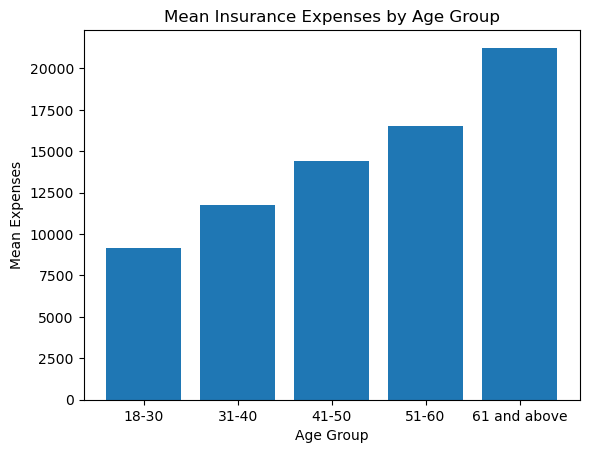

In [45]:
import matplotlib.pyplot as plt

# Define the age group bins and labels
age_bins = [18, 30, 40, 50, 60, float('inf')]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61 and above']

# Create an 'AgeGroup' column based on the age bins and labels
insurance['AgeGroup'] = pd.cut(insurance['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the mean insurance expenses for each age group
mean_expenses_by_age_group = insurance.groupby('AgeGroup')['expenses'].mean()

# Create a bar plot
plt.bar(mean_expenses_by_age_group.index, mean_expenses_by_age_group)
plt.xlabel('Age Group')
plt.ylabel('Mean Expenses')
plt.title('Mean Insurance Expenses by Age Group')
plt.show()


## SQ 1:    - Is there a connection between age and insurance expenses?

 
- H0: Age does not have an effect on insurance expenses 
- Ha: Age does have an effect on insurance expenses

In [46]:
# Define age groups
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

grouped_data = []

for group, age_range in age_groups.items():
    group_data = insurance[(insurance['age'] >= age_range[0]) & (insurance['age'] <= age_range[1])]['expenses']
    grouped_data.append(group_data)

# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

alpha = 0.05  # Set the significance level

# Print the results in an ANOVA-specific format
print("One-way ANOVA Test")
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < alpha:
    print("Result: There is significant evidence to reject the null hypothesis (Ha): Age does have an effect on insurance expenses.")
else:
    print("Result: Fail to reject the null hypothesis (H0): Age does not have an effect on insurance expenses.")


One-way ANOVA Test
F-statistic: 32.29
p-value: 0.0000
Result: There is significant evidence to reject the null hypothesis (Ha): Age does have an effect on insurance expenses.


This result indicates that there is a significant difference in insurance expenses across different age groups. The low p-value (0.0000) indicates strong evidence against the null hypothesis, which states that age does not have an effect on insurance expenses. The F-statistic (32.29) supports this, as it measures the ratio of the variance between groups to the variance within groups. Higher values of the F-statistic suggest a greater difference between group means.

## 1.1 Assumptions for Anova

Generally while performing ANOVA testing for the assumptions is a must

The assumptions for one-way ANOVA are:
1. *Sample independence*: each sample has been drawn independently of the other samples
2. *Normality*: each sample is taken from a normally distributed population 
3.  *Equal variance*: the variance of data within the different groups should be the same


### 2. Testing for normality
- *Compute the residuals*: the residuals are computes by simply subtracting from the measurements of each segment the mean value for that segment and dividing by the standard deviation of each segment.

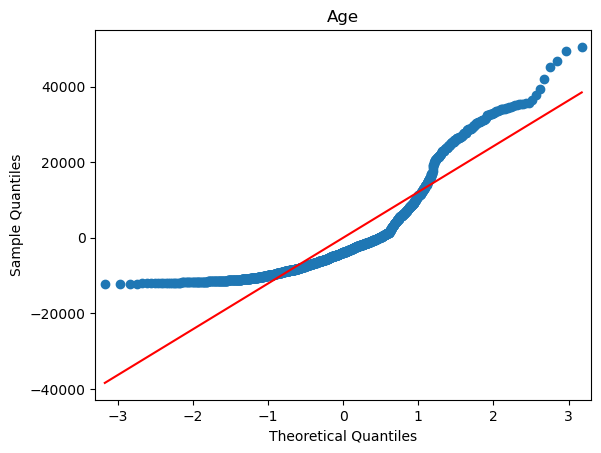

In [47]:

# Fit a linear model
income_segment_lm = sm.OLS(np.concatenate(grouped_data), sm.add_constant(np.concatenate([data.index.values for data in grouped_data]))).fit()

# Get the residuals
residuals = income_segment_lm.resid

# Create a QQ plot
sm.qqplot(residuals, line='s')

# Add labels and title
plt.title('Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


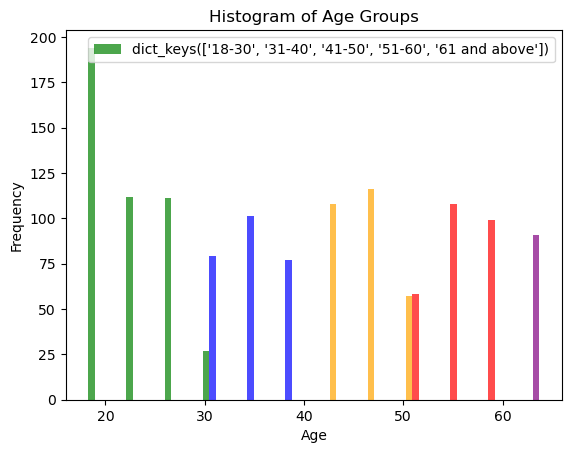

In [50]:
import matplotlib.pyplot as plt
import numpy as np

#  'insurance' is the  DataFrame with 'age' and 'expenses' columns
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

grouped_data = []

for group, age_range in age_groups.items():
    group_data = insurance[(insurance['age'] >= age_range[0]) & (insurance['age'] <= age_range[1])]['age']
    grouped_data.append(group_data)

# Create a histogram for 'age' with different colors for each group
colors = ['green', 'blue', 'orange', 'red', 'purple']
plt.hist(grouped_data, bins='auto', color=colors, alpha=0.7, rwidth=0.85, label=age_groups.keys())

# Add labels and title
plt.title('Histogram of Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a legend for age groups
plt.legend()

# Show the plot
plt.show()


- based on the QQ and Histogram it means that the data is not normally distrubted and that means that we have to use the levene's test for variance

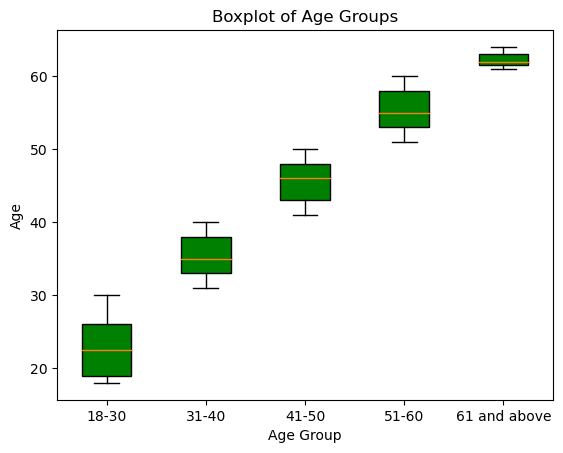

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'insurance' is your DataFrame with 'age' and 'expenses' columns
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

grouped_data = []

for group, age_range in age_groups.items():
    group_data = insurance[(insurance['age'] >= age_range[0]) & (insurance['age'] <= age_range[1])]['age']
    grouped_data.append(group_data)

# Create a boxplot for 'age' with a single color for all boxes
plt.boxplot(grouped_data, labels=age_groups.keys(), patch_artist=True, boxprops=dict(facecolor='green'))

# Add labels and title
plt.title('Boxplot of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Age')

# Show the plot
plt.show()

- The boxplot helps to visually analyzing the data first for testing equal variance

## 3. Testing for Equal Variance
- Levene Test
- To check whether the variances of different groups are significantly different. It does this by comparing the variances between groups with the variances within the age groups.

Levene's Test - p-value: 0.0000


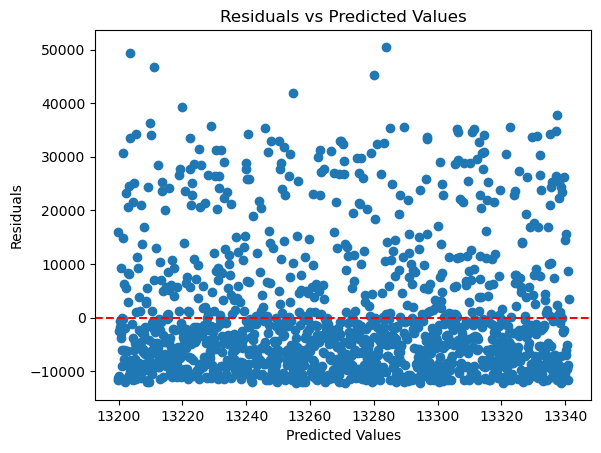

In [55]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# 2. Homogeneity of Variances assumption
# Using Levene's test
statistic, p_value_levene = stats.levene(*grouped_data)
print(f'Levene\'s Test - p-value: {p_value_levene:.4f}')

# Plot residuals against predicted values for visual inspection
plt.scatter(income_segment_lm.predict(), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


- The Levene test it indicates  that there is a significant difference in variances across the age groups.

## Conclusion
- The results indicates that there is significant evidence to reject the null hypothesis, suggesting that age does have an effect on insurance expenses.  In the one-way Anova test, the small p-value indicates that there is a significant difference in the mean expenses among the age groups. With the Levene test it indicated that the p-value is very small (p-value: 0.0000) and that there is a significant difference in variances across the age groups.

- In conclusion, the ANOVA results, combined with the Levene's Test results, support the conclusion that age plays a significant role in determining insurance expenses, and the effect is not consistent across all age groups.